1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

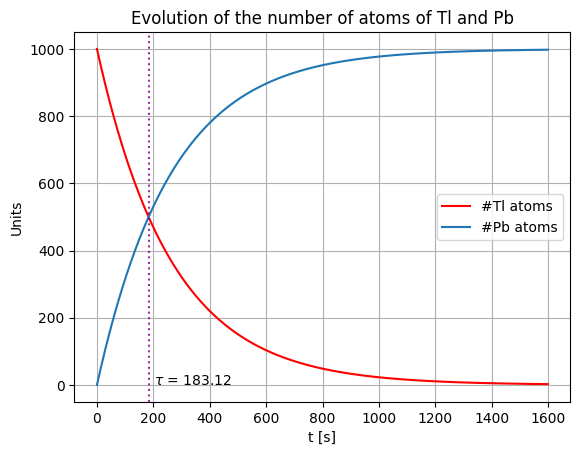

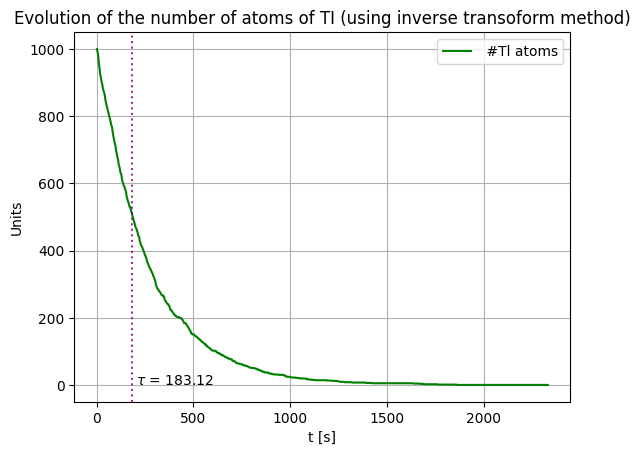

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

tau = 3.052*60
Ti = 1000

def p1(t, tau):
    return 1 - 2**(-t/tau)

t = np.arange(1600)
evolution_Ti = []
evolution_Pb = []
for i in t:
        number_decay_i = Ti*p1(i, tau) 
        if number_decay_i <= Ti:
            Ti_t_ith = Ti - number_decay_i
            Pb_t_th = number_decay_i
            evolution_Ti.append(Ti_t_ith)
            evolution_Pb.append(Pb_t_th)
        
plt.plot(t, evolution_Ti, label='#Tl atoms', color='red')
plt.plot(t, evolution_Pb, label='#Pb atoms')
plt.title('Evolution of the number of atoms of Tl and Pb')
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('Units')
plt.legend()
plt.annotate(fr'$\tau$ = {tau}', xy=(tau, 0.2), xytext=(tau + 20, 0.2))
plt.axvline(tau, 0, 1000, linestyle=':', color='purple', alpha=0.8)
plt.show()

u = np.random.uniform(0, 1, 1000)
u = np.array(sorted(u))
#print(u)


def inverse_cdf(u, tau):
    return -tau * np.log(1 - u) / np.log(2)


v = inverse_cdf(u, tau)
#print(v)

h, bins = np.histogram(v, bins=1000)

#print(h)
cumulative_decays = []
remaining_atoms = []
for hi in range(len(h)):
    cumulative_decay = np.sum(h[0:hi])
    cumulative_decays.append(cumulative_decay)
    remaining_atom = Ti - cumulative_decay
    remaining_atoms.append(remaining_atom)
    
bins_centers = (bins[:-1] + bins[1:]) / 2    
plt.plot(bins_centers, remaining_atoms, 'green', label=' #Tl atoms')
plt.grid()
plt.ylabel('Units')
plt.xlabel('t [s]')
plt.title('Evolution of the number of atoms of TI (using inverse transoform method)')
plt.axvline(tau, 0, 1000, linestyle=':', color='purple', alpha=0.8)
plt.annotate(fr'$\tau$ = {tau}', xy=(tau, 0.2), xytext=(tau + 20, 0.2))

plt.legend()

plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

The mean value of the intergal with the hint/miss method is:  1.3471812  ( 10000  random numbers and  1000  iterations )
The standard deviation is:  0.00030503948360827

The value of the integral with the mean value method is:  1.3476909556559613 ( 10000  random numbers )
The standard deviation is:  0.00666817264353153


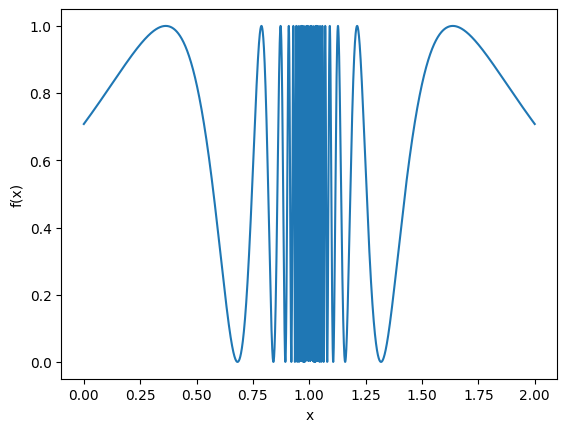

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (np.sin(1/(1-x)))**2

x = np.linspace(0,2, 10000)

y = f(x)

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')

m = 1000
N = 10000

def hint_miss(f, x_min, x_max, y_min, y_max, N):
    count = 0
    for i in range(N):
        x_i = np.random.uniform(x_min, x_max)
        y_i = np.random.uniform(y_min ,y_max)
        if y_i < f(x_i):
            count = count + 1
    
    return (count/N)*(x_max-x_min)*(y_max-y_min)
 
integrals = []
for i in range(m):
    intergrals_i = hint_miss(f, 0, 2, 0, 1, N)
    integrals.append(intergrals_i)

intergrals = np.array(intergrals_i)
mean_integrals = np.mean(integrals)
dev_intergals = np.std(integrals)/np.sqrt(m)
print('The mean value of the intergal with the hint/miss method is: ', mean_integrals,  ' (', N, ' random numbers and ', m, ' iterations )')
print('The standard deviation is: ', dev_intergals)


def mean_value(f, x_min, x_max, N):
    xi = np.random.uniform(x_min, x_max, N)
    yi = np.array([f(xii) for xii in xi])
    s = np.sum(yi)
    integ = (x_max - x_min) / N * s
    
    return integ

def calc_sigma(x_min, x_max, N, m):
    integrs = np.array([mean_value(f, x_min, x_max, N) for mi in np.arange(m)])
    sigma = np.sqrt(np.mean(integrs**2) - np.mean(integrs)**2)
    
    return sigma

integr = mean_value(f, 0, 2, N)
sigma = calc_sigma(0, 2, 10000, m)
print('\nThe value of the integral with the mean value method is: ', integr, '(', N, ' random numbers )')
print('The standard deviation is: ', sigma)

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [3]:
import numpy as np 

x_min = -1
x_max = 1
N = 100000

def semicircle(x):
    return np.sqrt(1-x**2)

def mean_value(f, xmin, xmax, N):
    xi = np.random.uniform(xmin, xmax, N)
    yi = np.array([f(xii) for xii in xi])
    s = np.sum(yi)
    integr = s*(xmax-xmin)/N
                   
    return integr

circle_area = 2*mean_value(semicircle, x_min, x_max, N)
print('The area of a circle of unit radius is: ', circle_area)
print('(', N, ' random numbers are used )')
print('\nThe difference with respect to pi is: ', np.pi - circle_area)


def integral10D(N):
    x = np.random.uniform(low = -1, high = 1, size = (10, N)) 
    f = np.sum(x**2, axis = 0) <= 1
    return 2**10*np.sum(f)/N

print('\n\n\n-------------------')
print('The volume of unit 10D sphere: ', integral10D(N))

The area of a circle of unit radius is:  3.138581340958187
( 100000  random numbers are used )

The difference with respect to pi is:  0.0030113126316062555



-------------------
The volume of unit 10D sphere:  2.38592


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

The value of w_int:  1.998460744779425


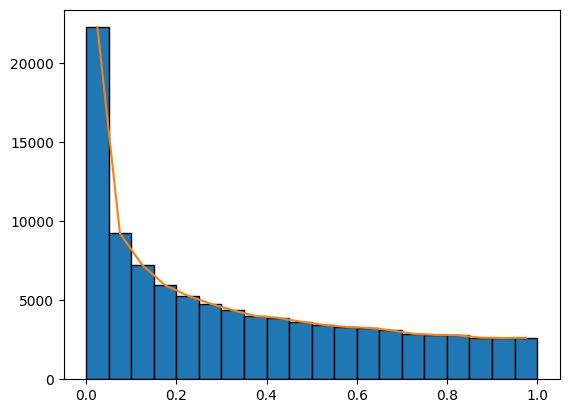

The value of the integral is:  0.8378747064853613


In [9]:
import numpy as np 

def w(x):
    return 1/np.sqrt(x)

def f(x):
    return (x**(-0.5))/(np.exp(x)+1)

n = 100000

#Devo generare campioni secondo la distribuzione della weight function
u1 = np.random.random(n)
# 1) the cdf of 1/sqrt(x) is 2*sqrt(x)
# 2) the inverse of 2*sqrt(x) is (x/2)**2
#v1 = (u1/2)**2 #WRONG
v1 = (u1)**2 #TRUE

#calcolo di w_int (OK)
#u = np.random.random(n)
v = w(u1)
s = np.sum(v)
w_int = s*(1-0)/n
print('The value of w_int: ', w_int)

##########
h, bins, _ = plt.hist(v1, bins=20, edgecolor='black')
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.plot(bin_centers, h)
plt.show()
##########

h_is = (1.0 / n) * ( np.sum(f(v1)/w(v1)) ) * w_int
print('The value of the integral is: ', h_is)